### MT
1. Why you cannot use even number for block_size in adaptive thresholding
2. How can you determine the value of C (pos, zero, neg)
3. Explain the effect of block_size (bigger or smaller) in case of Adaptive Thresholding.

🔹 MT

1️⃣ কেন Adaptive Thresholding-এ block_size even সংখ্যা হতে পারে না?

2️⃣ C এর মান কীভাবে নির্ধারণ করা যায়? (C এর মান ধনাত্মক (pos), শূন্য (zero), ঋণাত্মক (neg) হলে কী প্রভাব পড়ে?)

3️⃣ Adaptive Thresholding-এ block_size ছোট বা বড় হলে কী প্রভাব পড়ে?

### Answer 1:
Reason: Adaptive Thresholding calculates the threshold for each pixel based on the mean or median of a surrounding block_size x block_size window.

If block_size is odd: There is a clear center pixel (e.g., 3x3, 5x5, 7x7)

1   2   3

4   5   6   <- Center pixel (5)

7   8   9

If block_size is even: There is no exact center, causing calculation issues

1   2   3   4

5   6   7   8   <- No single center pixel

9  10  11  12

13 14  15  16


### Answer 2
In Adaptive Thresholding, the threshold value is calculated dynamically for different regions of the image instead of using a single global threshold. The formula for thresholding in each local window is:

𝑇(𝑥,𝑦)=Mean or Median−𝐶

Here, C is a constant that is subtracted from the calculated mean or median intensity of the pixels in a local window. This C value plays a crucial role in determining the final threshold, affecting how much of the image is classified as black (0) or white (255).

🔹 Effect of C on Thresholding Results

1. Positive +C (More Black Areas)
When C is positive, the computed threshold value is reduced because a positive number is subtracted from the mean/median.
As a result, more pixels in the local window will fall above the threshold and will be set to black (0) in binary images.
This helps in removing small bright details and focusing more on darker regions.

Use Case:
If the image has lots of noise in bright areas, increasing C helps suppress unnecessary details by making more regions black.

2. Zero C (Standard Thresholding)
When C = 0, the threshold value remains exactly the same as the computed mean or median in the local region.
This means that Adaptive Thresholding will work only based on the local intensity, without any extra adjustments.

Use Case:
If the image already has a good contrast balance, keeping C = 0 ensures that thresholding happens naturally without over-suppressing or over-enhancing details.

3. Negative -C (More White Areas)
When C is negative, the computed threshold value is increased because a negative number is subtracted from the mean/median.
This makes more pixels fall below the threshold, so they are classified as white (255) in the binary image.
As a result, more details from the brighter parts of the image are retained, and less background is removed.

Use Case:
If the image has important bright details that should not be removed, using a negative C ensures that those details stay visible.

### Anwer 3:

Effect of Small block_size (e.g., 3×3, 5×5, 7×7)

- Preserves finer details
- Better for images with high local contrast
- May introduce noise and unwanted artifacts

Effect of Large block_size (e.g., 15×15, 25×25, 31×31)

- Smoothens regions and removes noise
- Better for images with gradual lighting changes
- May lose fine details

OT:
1. In Otsu’s Thresholding setting a threshold value does not affect the final threshold value of the output image, prove with number.
2. Use adaptive thresholding method to separate the given berry image from background + remove unwanted background as better as possible.

🔹 OT

1️⃣ প্রমাণ করতে হবে যে Otsu’s Thresholding-এ প্রাথমিকভাবে সেট করা threshold মানটি চূড়ান্ত threshold মানের ওপর কোনো প্রভাব ফেলে না। (সংখ্যা ব্যবহার করে দেখাতে হবে)

2️⃣ Adaptive Thresholding ব্যবহার করে একটি Berry (বেরি) ইমেজ থেকে ব্যাকগ্রাউন্ড আলাদা করতে হবে এবং যতটা সম্ভব ভালোভাবে ব্যাকগ্রাউন্ড রিমুভ করতে হবে।

### OT Answers

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [65]:
# img.shape

In [66]:
# plt.imshow(img, cmap='gray')

160.0
111.0


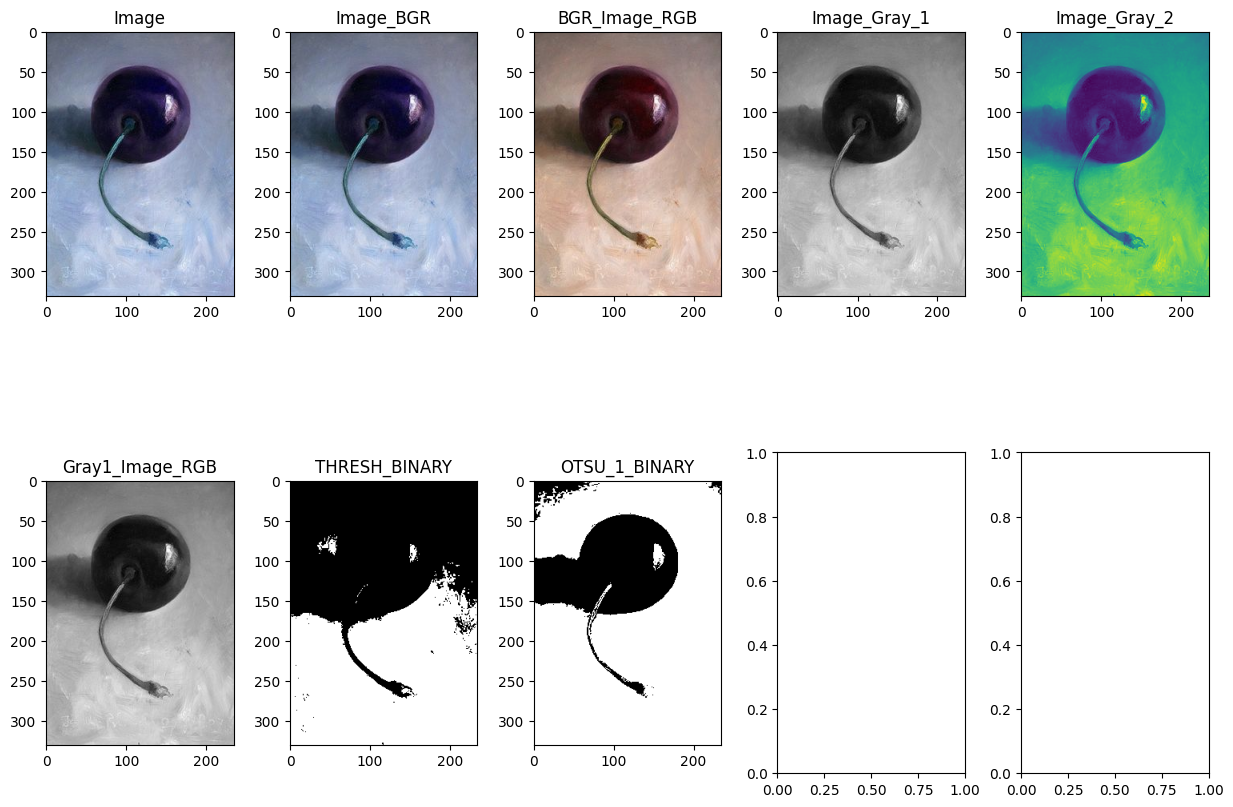

In [67]:
img_path = '/content/berry-1.jpg'

fig, axis = plt.subplots(2, 5, figsize=(15,10))
plt.subplots_adjust(hspace=0.4, wspace=0.3) # Add space between rows and columns

img = cv2.imread(img_path)
axis[0, 0].imshow(img)
axis[0, 0].set_title('Image')

img_bgr = cv2.imread(img_path)
axis[0, 1].imshow(img_bgr)
axis[0, 1].set_title('Image_BGR')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
axis[0, 2].imshow(img_rgb)
axis[0, 2].set_title('BGR_Image_RGB')

img_gray_1 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
axis[0, 3].imshow(img_gray_1, cmap='gray')
axis[0, 3].set_title('Image_Gray_1')

img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
axis[0, 4].imshow(img_gray)
axis[0, 4].set_title('Image_Gray_2')

img_rgb = cv2.cvtColor(img_gray_1, cv2.COLOR_GRAY2RGB)
axis[1, 0].imshow(img_rgb)
axis[1, 0].set_title('Gray1_Image_RGB')

retval, thresholded = cv2.threshold(img_gray, 160, 255, cv2.THRESH_BINARY)
axis[1, 1].imshow(thresholded, cmap='gray')
axis[1, 1].set_title('THRESH_BINARY')
print(retval)

retval1, otsu1 = cv2.threshold(img_gray_1, 160, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
axis[1, 2].imshow(otsu1, cmap='gray')
axis[1, 2].set_title('OTSU_1_BINARY')
print(retval1)

At Second if we use a threshold then

Text(0.5, 1.0, 'Adaptive_Gaussian_2')

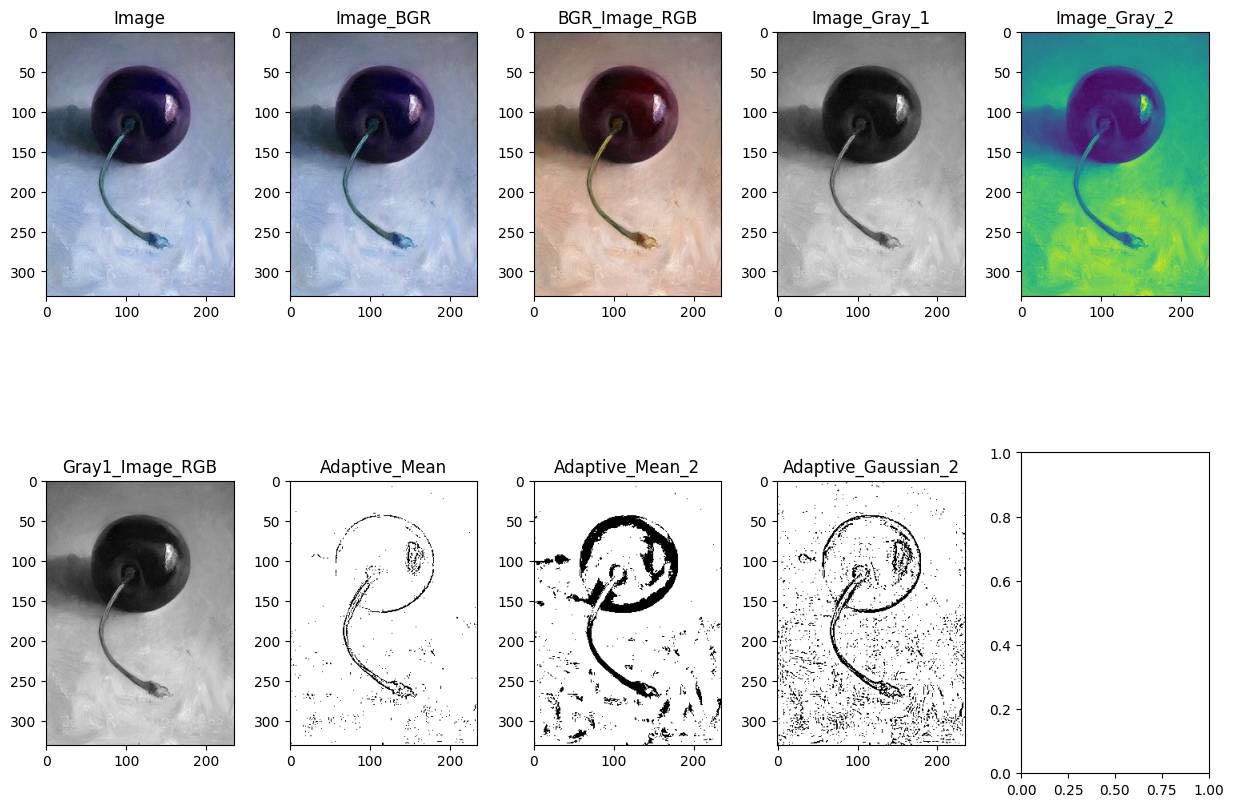

In [104]:
img_path = '/content/berry-1.jpg'


fig, axis = plt.subplots(2, 5, figsize=(15,10))
plt.subplots_adjust(hspace=0.4, wspace=0.3) # Add space between rows and columns

img = cv2.imread(img_path)
axis[0, 0].imshow(img)
axis[0, 0].set_title('Image')

img_bgr = cv2.imread(img_path)
axis[0, 1].imshow(img_bgr)
axis[0, 1].set_title('Image_BGR')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
axis[0, 2].imshow(img_rgb)
axis[0, 2].set_title('BGR_Image_RGB')

img_gray_1 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
axis[0, 3].imshow(img_gray_1, cmap='gray')
axis[0, 3].set_title('Image_Gray_1')

img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
axis[0, 4].imshow(img_gray)
axis[0, 4].set_title('Image_Gray_2')

img_rgb = cv2.cvtColor(img_gray_1, cv2.COLOR_GRAY2RGB)
axis[1, 0].imshow(img_rgb)
axis[1, 0].set_title('Gray1_Image_RGB')

adaptive_mean = cv2.adaptiveThreshold(img_gray_1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 10)
axis[1, 1].imshow(adaptive_mean, 'gray')
axis[1, 1].set_title('Adaptive_Mean')

adaptive_mean = cv2.adaptiveThreshold(img_gray_1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 25, 10)
axis[1, 2].imshow(adaptive_mean, 'gray')
axis[1, 2].set_title('Adaptive_Mean_2')

adaptive_gaussian = cv2.adaptiveThreshold(img_gray_1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 5)
axis[1, 3].imshow(adaptive_gaussian, 'gray')
axis[1, 3].set_title('Adaptive_Gaussian_2')